In [1]:
import pickle
import seaborn as sns

In [18]:
%run -i 0_functions.py

# 1. Run dynchro on rep1, rep2 and rep3

In [9]:
rep1_mono = read_with_pc("data/rep1_mono.h5ad")
rep2_mono = read_with_pc("data/rep2_mono.h5ad")
rep3_mono = read_with_pc("data/rep3_mono.h5ad")

rep1_ery = read_with_pc("data/rep1_ery.h5ad")
rep2_ery = read_with_pc("data/rep2_ery.h5ad")
rep3_ery = read_with_pc("data/rep3_ery.h5ad")

mono = [rep1_mono, rep2_mono, rep3_mono]
ery = [rep1_ery, rep2_ery, rep3_ery]
rep1s = [rep1_mono, rep1_ery]
rep2s = [rep2_mono, rep2_ery]
rep3s = [rep3_mono, rep3_ery]

In [10]:
rep1_mono, rep2_mono, rep3_mono

(AnnData object with n_obs × n_vars = 3721 × 14651
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'cell_type', 'milestones', 'pseudotime', 'Mono'
     uns: 'cell_type_colors', 'cluster_colors', 'clusters_colors', 'ct_colors', 'id', 'lineage_labels', 'palantir_branch_probs_cell_types', 'pseudocells', 'pseudocells_100_Mono_pseudotime', 'pseudocells_100_Mono_pseudotime_index', 'pseudocells_100_Mono_pseudotime_values'
     obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs', 'tsne'
     varm: 'pseudocells_100_Mono',
 AnnData object with n_obs × n_vars = 3794 × 14913
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'cell_type', 'milestones', 'pseudotime', 'Mono'
     uns: 'cell_type_colors', 'cluster_colors', 'clusters_colors', 'ct_colors', 'id', 'lineage_labels', 'palantir_branch_probs_cell_types', 'pseudocells', 'pseudocells_100_Mono_pseudotime', 'pseudocells_100_Mono_pseudotime_index', 'pseudocells_100_Mono_pseudotime_values'
    

In [11]:
rep1_ery, rep2_ery, rep3_ery

(AnnData object with n_obs × n_vars = 2113 × 14651
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'cell_type', 'milestones', 'pseudotime', 'Ery'
     uns: 'cell_type_colors', 'cluster_colors', 'clusters_colors', 'ct_colors', 'id', 'lineage_labels', 'palantir_branch_probs_cell_types', 'pseudocells', 'pseudocells_100_Ery_pseudotime', 'pseudocells_100_Ery_pseudotime_index', 'pseudocells_100_Ery_pseudotime_values'
     obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs', 'tsne'
     varm: 'pseudocells_100_Ery',
 AnnData object with n_obs × n_vars = 3203 × 14913
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'cell_type', 'milestones', 'pseudotime', 'Ery'
     uns: 'cell_type_colors', 'cluster_colors', 'clusters_colors', 'ct_colors', 'id', 'lineage_labels', 'palantir_branch_probs_cell_types', 'pseudocells', 'pseudocells_100_Ery_pseudotime', 'pseudocells_100_Ery_pseudotime_index', 'pseudocells_100_Ery_pseudotime_values'
     obsm: 'M

In [19]:
all_datasets = [rep1_mono, rep2_mono, rep3_mono, rep1_ery, rep2_ery, rep3_ery]
# list of lists with 6 zeroes each
results = [[0 for i in range(6)] for j in range(6)]

for i1 in range(len(all_datasets)):
    for j1 in range(i1, len(all_datasets)):
        print(f"{i1} {j1}")
        d1 = all_datasets[i1]
        d2 = all_datasets[j1]
        res = dynchro_wrapper(d1, d2)
        results[i1][j1] = res
        # fill it in the other triangle
        results[j1][i1] = res

0 0
0 1
0 2
0 3
0 4
0 5
1 1
1 2
1 3
1 4
1 5
2 2
2 3
2 4
2 5
3 3
3 4
3 5
4 4
4 5
5 5


In [8]:
pickle.dump(results, open("data/results_dynchro_all_genes.pkl", "wb"))

In [20]:
all_dist = [[res[0].dist() for res in res1] for res1 in results]
all_dist_norm = [[res[0].dist_norm() for res in res1] for res1 in results]
all_dist_norm_path = [[res[0].dist_norm_path() for res in res1] for res1 in results]

In [21]:
labels = ["rep 1 mono", "rep 2 mono", "rep 3 mono", "rep 1 ery", "rep 2 ery", "rep 3 ery"]

<Axes: >

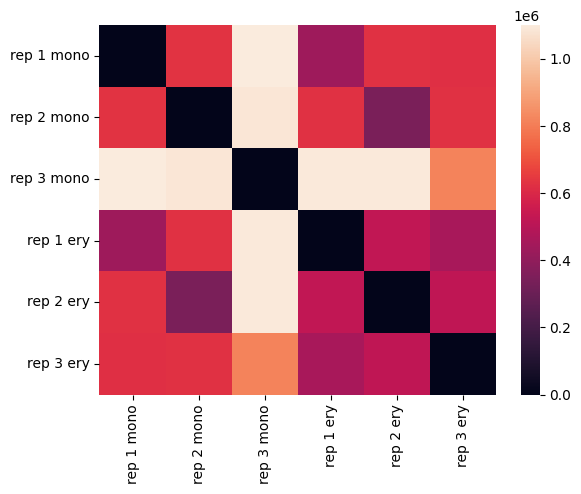

In [22]:
sns.heatmap(all_dist, xticklabels=labels, yticklabels =labels)

<Axes: >

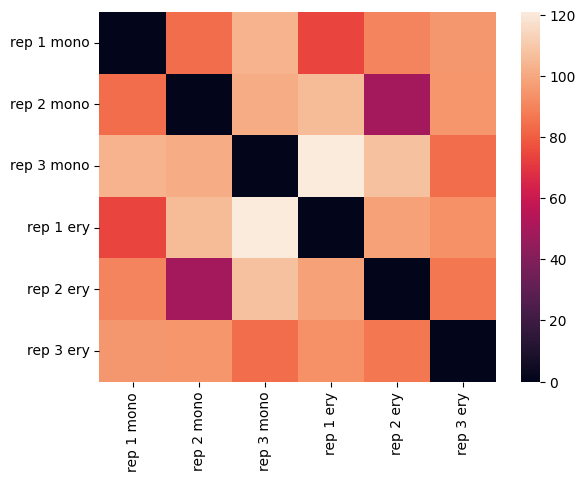

In [23]:
sns.heatmap(all_dist_norm, xticklabels=labels, yticklabels =labels)

<Axes: >

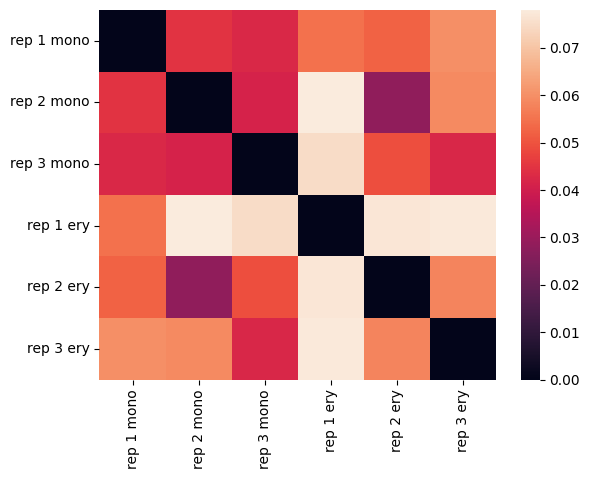

In [24]:
sns.heatmap(all_dist_norm_path, xticklabels=labels, yticklabels =labels)

# 2. Run dynchro on HVG's of rep1, rep2 and rep3

In [3]:
rep1_mono_hvg = read_with_pc("data/rep1_mono_hvg.h5ad")
rep2_mono_hvg = read_with_pc("data/rep2_mono_hvg.h5ad")
rep3_mono_hvg = read_with_pc("data/rep3_mono_hvg.h5ad")

rep1_ery_hvg = read_with_pc("data/rep1_ery_hvg.h5ad")
rep2_ery_hvg = read_with_pc("data/rep2_ery_hvg.h5ad")
rep3_ery_hvg = read_with_pc("data/rep3_ery_hvg.h5ad")

In [7]:
all_datasets_hvg = [rep1_mono_hvg, rep2_mono_hvg, rep3_mono_hvg, rep1_ery_hvg, rep2_ery_hvg, rep3_ery_hvg]
# list of lists with 6 zeroes each
results_hvg = [[0 for i in range(6)] for j in range(6)]

for i1 in range(len(all_datasets_hvg)):
    for j1 in range(i1, len(all_datasets_hvg)):
        print(f"{i1} {j1}")
        d1 = all_datasets_hvg[i1]
        d2 = all_datasets_hvg[j1]
        res = dynchro_wrapper(d1, d2)
        results_hvg[i1][j1] = res
        # fill it in the other triangle
        results_hvg[j1][i1] = res



NameError: name 'rep1_mono_hvg' is not defined

In [5]:
pickle.dump(results_hvg, open("data/results_dynchro_hvg_genes.pkl", "wb"))

In [6]:
labels = ["rep 1 mono", "rep 2 mono", "rep 3 mono", "rep 1 ery", "rep 2 ery", "rep 3 ery"]

In [7]:
hvg_dist = [[res[0].dist() for res in res1] for res1 in results_hvg]
hvg_dist_norm = [[res[0].dist_norm() for res in res1] for res1 in results_hvg]
hvg_dist_norm_path = [[res[0].dist_norm_path() for res in res1] for res1 in results_hvg]

<Axes: >

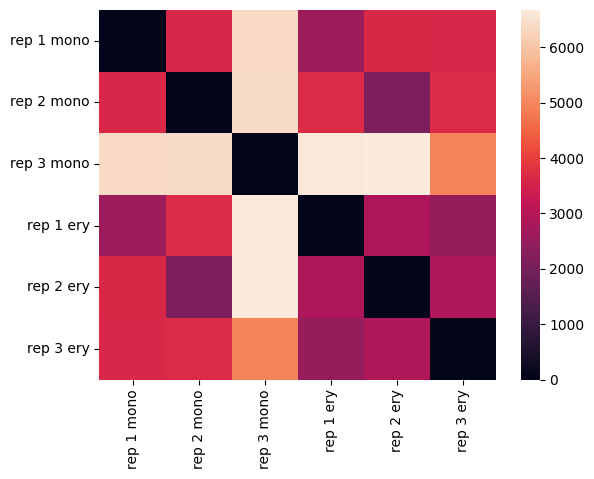

In [8]:
sns.heatmap(hvg_dist, xticklabels=labels, yticklabels=labels)

<Axes: >

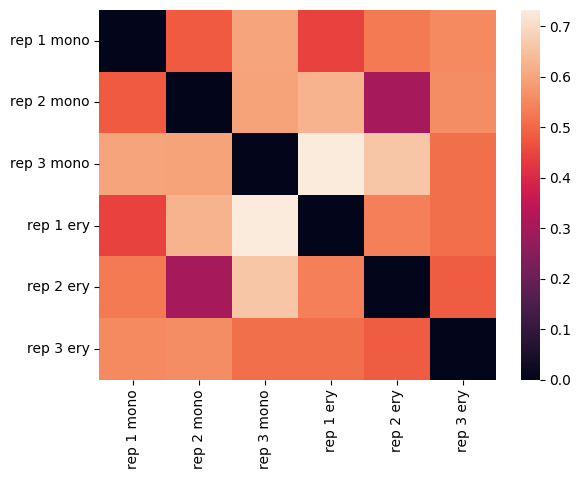

In [9]:
sns.heatmap(hvg_dist_norm, xticklabels=labels, yticklabels=labels)

<Axes: >

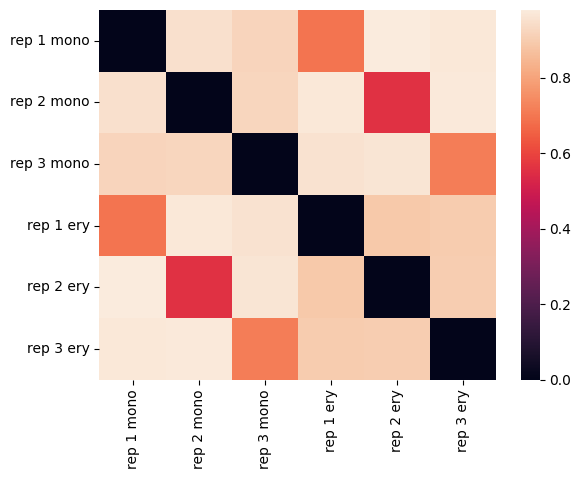

In [10]:
sns.heatmap(hvg_dist_norm_path, xticklabels=labels, yticklabels=labels)